# TACHE 5 : Symmetry

Dans ce notebook nous allons étudier l’effet de 3 éléments de symétrie différents, chacun pour 1 atome différent du cristal SrCN₂.

Dans cette cellule de code, nous récupérons la structure conventionnelle du SrCN₂ depuis Materials Project.<br>
Dans ce notebook, nous utiliserons la maille conventionnelle car elle offre une une visualisation plus intuitive des plans et des axes de symétrie par rapport à la maille primitive, en raison de sa plus grande taille.

In [18]:
from mp_api.client import MPRester
from pymatgen.core.operations import SymmOp
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from jupyter_jsmol.pymatgen import quick_view
from jupyter_jsmol import JsmolView
from IPython.display import Image

In [19]:
mp_key = "hGFJONMWFhZMzX55ulNNTvmOkGE07nJS"
mp_id = "mp-12317"

In [20]:
with MPRester(mp_key) as m:
    prim_struc = m.get_structure_by_material_id(mp_id)
conv_struc = SpacegroupAnalyzer(prim_struc).get_conventional_standard_structure()
symmops = SpacegroupAnalyzer(conv_struc).get_space_group_operations()

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

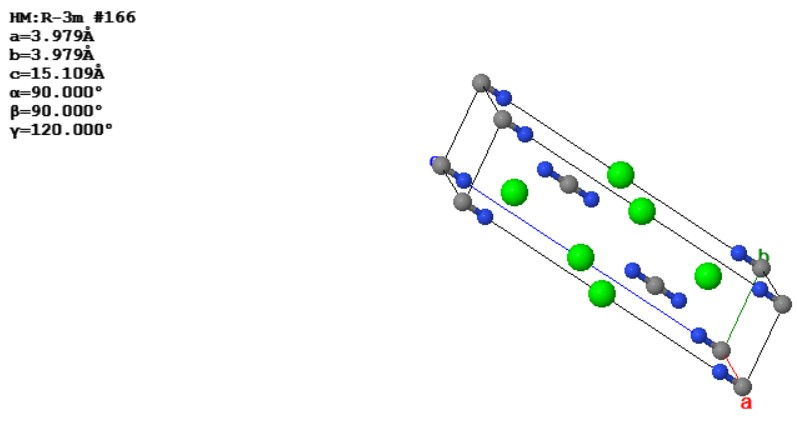

In [21]:
#JsmolView.default_info['color']='white'
#view = quick_view(prim_struc, "packed", conventional = True)
#display(view)
display(Image(filename="Sym_conventionnelle.jpg"))

## Première opération de symétrie : 

La première opération de symétrie que nous allons analyser est une rotation d'ordre 4 appliquée à l'atome Sr.

In [22]:
i_atom = 1 #Sr
i_symmop = 3 #'-y, x-y, z'

In [23]:
symmop = symmops[i_symmop - 1]
print(symmop)

Rot:
[[ 0. -1.  0.]
 [ 1. -1.  0.]
 [ 0.  0.  1.]]
tau
[0. 0. 0.]


In [24]:
pos_init = conv_struc.sites[i_atom -1].frac_coords
print('Coordonnées initiales du Sr :',pos_init)
pos_final = symmop.operate(pos_init)
print('Coordonnées finales du Sr :', pos_final)

Coordonnées initiales du Sr : [0.66666667 0.33333333 0.83333333]
Coordonnées finales du Sr : [-0.33333333  0.33333333  0.83333333]


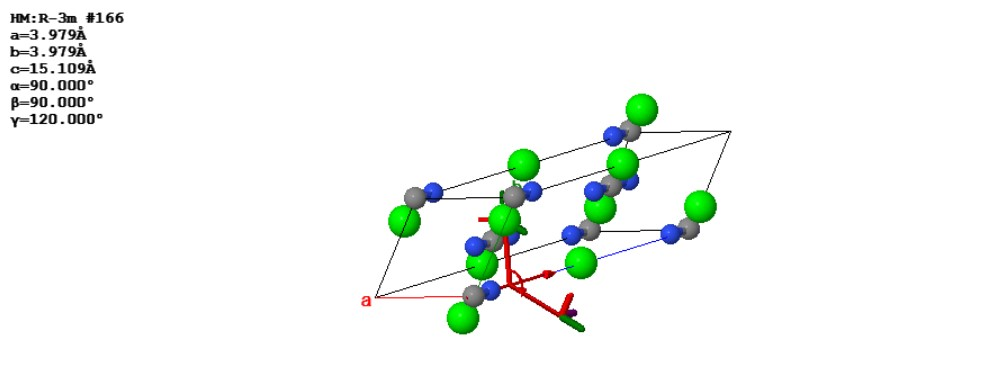

In [25]:
#v1 = quick_view(conv_struc)
#display(v1)
#v1.script("draw symop 3 {atomno=1}")
display(Image(filename="Sym_rotation.jpg"))

### Analyse :
La rotation autour d'un axe est une opération de première espèce. Cette opération conserve la chiralité. Le déterminant de la matrice de rotation vaut 1.

$$
\begin{bmatrix} 0 & -1 & 0 \\ 1 & -1 & 0 \\ 0 & 0 & 1 \end{bmatrix} \times \begin{bmatrix} x \\ y \\ z \end{bmatrix} = \begin{bmatrix} -y \\ x-y \\ z \end{bmatrix}
$$

## Deuxième opération de symétrie :

La seconde opération de symétrie que nous allons analyser est une réflexion appliquée à l'atome C.

In [26]:
i_atom = 2 #C
i_symmop = 12 # 'x, x-y, z'

In [27]:
symmop = symmops[i_symmop - 1] 
print(symmop)

Rot:
[[ 1.  0.  0.]
 [ 1. -1.  0.]
 [ 0.  0.  1.]]
tau
[0. 0. 0.]


In [28]:
pos_init = conv_struc.sites[i_atom -1].frac_coords
print('Coordonnées initiales du C:',pos_init)
pos_final = symmop.operate(pos_init)
print('Coordonnées finales du C:',pos_final)

Coordonnées initiales du C: [0.33333333 0.66666667 0.16666667]
Coordonnées finales du C: [ 0.33333333 -0.33333333  0.16666667]


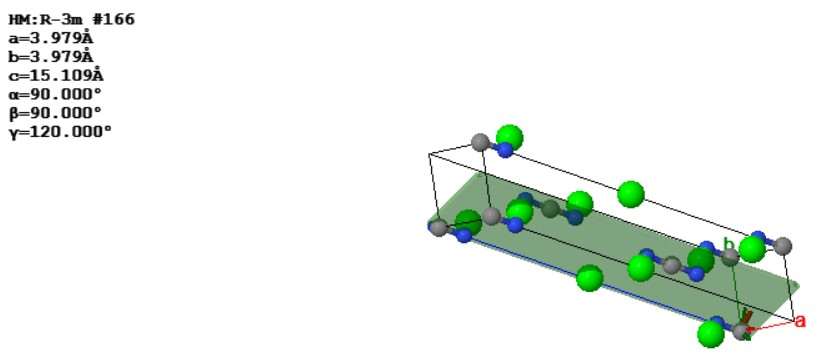

In [29]:
#v1 = quick_view(conv_struc)
#display(v1)
#v1.script("draw symop 12 {atomno=2}")
display(Image(filename="Sym_réflexion.jpg"))

### Analyse :
La réflexion par rapport à un plan miroir est une opération de deuxième espèce. Le déterminant de la matrice vaut -1.
$$
\begin{bmatrix} 1 & 0 & 0 \\ 1 & -1 & 0 \\ 0 & 0 & 1 \end{bmatrix} \times \begin{bmatrix} x \\ y \\ z \end{bmatrix} = \begin{bmatrix} x \\ x-y \\ z \end{bmatrix}
$$

## Troisième opération de symétrie :

La troisième opération de symétrie que nous allons analyser est une inversion appliquée à l'atome N.

In [30]:
i_atom =3 #N
i_symmop = 2 #'-x, -y, -z'

In [31]:
symmop = symmops[i_symmop - 1]
print(symmop)

Rot:
[[-1.  0.  0.]
 [ 0. -1.  0.]
 [ 0.  0. -1.]]
tau
[0. 0. 0.]


In [32]:
pos_init = conv_struc.sites[i_atom -1].frac_coords
print('Coordonnées initiales du N:',pos_init)
pos_final = symmop.operate(pos_init)
print('Coordonnées finales du N:',pos_final)

Coordonnées initiales du N: [1.  1.  0.5]
Coordonnées finales du N: [-1.  -1.  -0.5]


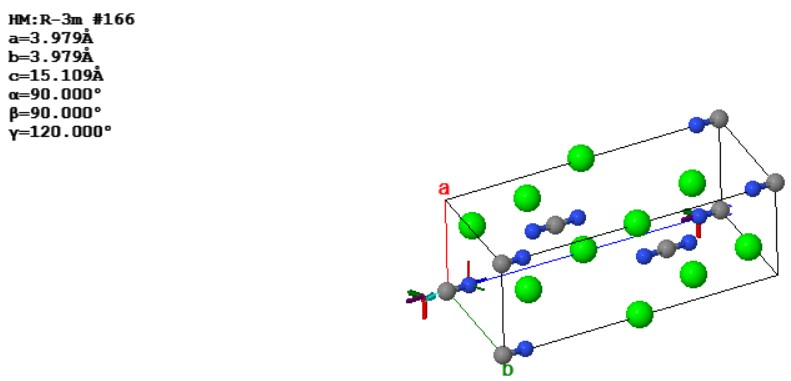

In [33]:
#v1 = quick_view(conv_struc)
#display(v1)
#v1.script("draw symop 2 {atomno=3}")
display(Image(filename="Sym_inversion.jpg"))

### Analyse
L'inversion par rapport à un centre est une opération de deuxième espèce. Le déterminant de la matrice vaut -1.
$$
\begin{bmatrix} -1 & 0 & 0 \\ 0 & -1 & 0 \\ 0 & 0 & -1 \end{bmatrix} \times \begin{bmatrix} x \\ y \\ z \end{bmatrix} = \begin{bmatrix} -x \\ -y \\ -z \end{bmatrix}
$$